we are going to build a a regression model using stochastic gradient descent as a way of training

Since we know our data already let's go ahead and prepare our data for modeling


In [1]:
#import relevant modules

#data loading and analysis
import numpy as np
import pandas as pd

#data cleaning

from sklearn.impute import SimpleImputer

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#model

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

Let's Load our dataset

In [2]:
housing=pd.read_csv('housing.csv')

#confirm loaded dataset

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#information about the dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We have 207 missing values in the total bedrooms columns

Let's go ahead and prepare the dataset

In [5]:
#split the dataset into training set and testing set
#Keep the same random state as before since we will be comparing with the previous model

from sklearn.model_selection import train_test_split

train,test=train_test_split(housing,test_size=0.2, train_size=0.8, random_state=42)



In [6]:
#some information about our training set

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [7]:
train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

All the missing values are in the training set we should have solved this from the beginning but lets continue...

Let's engineer new features

In [8]:
train['rooms_per_household']=train['total_rooms']/train['households']
train["bedrooms_per_room"]=train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"]=train["population"]/train["households"]

split the data into features and labels

In [9]:
#labels
train_labels=train['median_house_value']

#features
features=train.drop('median_house_value',axis=1)

#numerical features
num_features=features.drop('ocean_proximity',axis=1)



let's create our pipeline

In [10]:
#numeric Pipline

num_pipeline=Pipeline([('impute',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

let's create a full_pipeline using the column transformer

Before that let's import onehotencoder to encode the categorical columns

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attributes=list(num_features)
cat_attributes=['ocean_proximity']


full_pipeline=ColumnTransformer([('num',num_pipeline,num_attributes),('cat',OneHotEncoder(),cat_attributes)])

train_prepared=full_pipeline.fit_transform(features)

Data is ready smile 😁

A look at the our prepared dataset

In [12]:
type(train_prepared)

numpy.ndarray

Start to Build the model

In [16]:
#the default is the squared error

sgd=SGDRegressor()

sgd.fit(train_prepared,train_labels)

SGDRegressor()

Training is done!

Let's Test on the training data

In [17]:
pred=sgd.predict(train_prepared)

#let's look at how well it is performing 

First let's visualize the error

In [18]:
dict={'Actual':train_labels,'predicted':pred}

df=pd.DataFrame(dict)

df1=df.head(10)

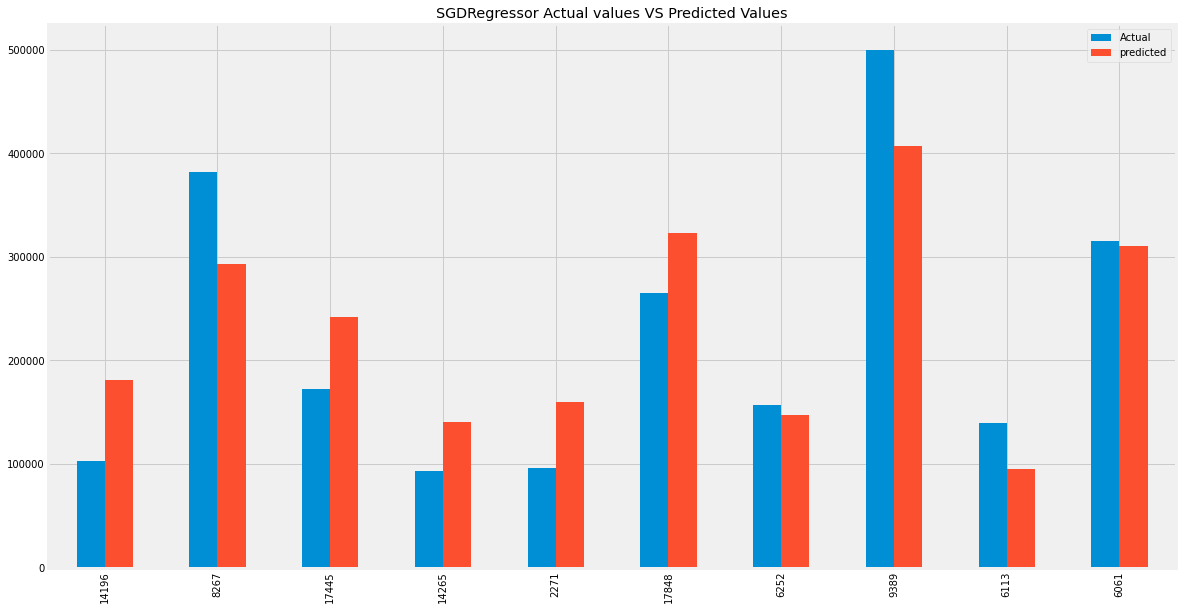

In [19]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df1.plot(kind='bar',figsize=(18,10));

plt.title('SGDRegressor Actual values VS Predicted Values')

plt.show()

we can see it's not doing so well

Let's look at the error in numbers

In [20]:
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as RMSE

mean_error=MAE(train_labels,pred)

percentage_error=(mean_error/train_labels.mean())*100

rmse=RMSE(train_labels,pred)

print(f'mean absolute error = {mean_error:,.2f}\n\npercentage error = {percentage_error:.2f}%\n\nRMSE = {rmse:,.2f}')

mean absolute error = 48,976.65

percentage error = 23.64%

RMSE = 5,106,834,662.16


The model is not overfitting the dataset however let's do the cross validation

In [23]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(sgd,train_prepared,train_labels,scoring='neg_mean_squared_error',cv=10)

sgd_scores=np.sqrt(-scores)

A funcion for viewing the scores

In [48]:
#lets look at the scores

def display_scores(scores):
    print('scores: ',scores)
    print('Mean: ' ,scores.mean())
    print('Standard deviation: ', scores.std())

In [25]:
display_scores(sgd_scores)

scores:  [6.50962406e+04 7.16543726e+04 3.58050195e+05 6.73492905e+04
 7.07494039e+04 6.70139993e+04 4.08370457e+05 6.97339925e+04
 6.77593218e+07 7.24391009e+04]
Mean:  6900977.885004923
Standard deviation:  20286496.034521576


Let's Use Gridsearchcv to fine tune the model

In [26]:
from sklearn.model_selection import GridSearchCV

sgd=SGDRegressor()
n=train_prepared.shape[0]
param_grid=[{'max_iter':[np.ceil(10**6 / n)],'early_stopping':[True]},{'max_iter':[np.ceil(10**6 / n)],'early_stopping':[False]}]

grid_search=GridSearchCV(sgd,param_grid,scoring='neg_mean_squared_error',return_train_score=True,cv=5)

grid_search.fit(train_prepared,train_labels)



GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'early_stopping': [True], 'max_iter': [61.0]},
                         {'early_stopping': [False], 'max_iter': [61.0]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [27]:
grid_search.best_params_

{'early_stopping': False, 'max_iter': 61.0}

In [28]:
grid_search.best_estimator_

SGDRegressor(max_iter=61.0)

let's make predictions with the best estimator

In [29]:
# save the best estimator to model_sgd

model_sgd=grid_search.best_estimator_

#make predictions with the model

pred=model_sgd.predict(train_prepared)

In [30]:
#pred=model_sgd.predict(train_prepared)
error=MAE(train_labels,pred)

In [31]:
percentage_error=(error/train_labels.mean())*100

rmse=RMSE(train_labels,pred)

print(f'mean absolute error = {error:,.2f}\n\npercentage error = {percentage_error:.2f}%\n\nRMSE = {rmse:,.2f}')

mean absolute error = 52,754.67

percentage error = 25.46%

RMSE = 5,821,957,951.12


The error has reduced but not so much

Let's visulize the pred and actual values

In [46]:
dict={'Actual':train_labels,'predicted':pred}

df=pd.DataFrame(dict)

df1=df.head(10)





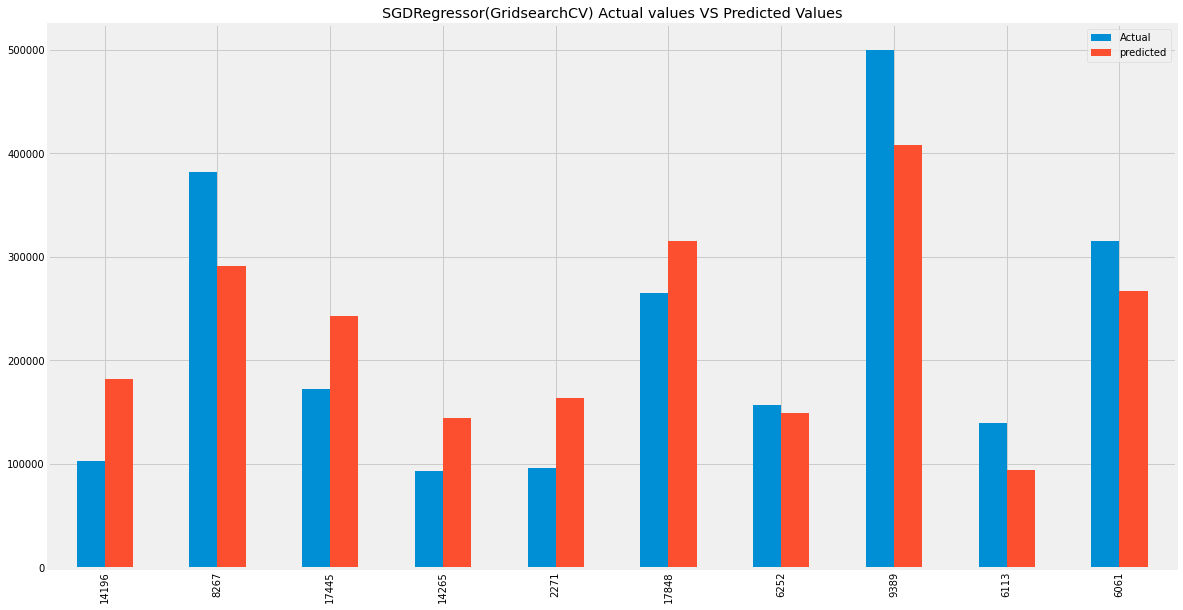

In [47]:
df1.plot(kind='bar',figsize=(18,10));

plt.title('SGDRegressor(GridsearchCV) Actual values VS Predicted Values')

plt.show()

let's train again by modifying the hyperparams

In [44]:
sgd=SGDRegressor()
n=train_prepared.shape[0]
param_grid=[{'max_iter':[np.ceil(10**6 / n)],'early_stopping':[True]},
            {'max_iter':[np.ceil(10**6 / n)],'early_stopping':[False]}]

grid_search=GridSearchCV(sgd,param_grid,scoring='neg_mean_squared_error',return_train_score=True,cv=5)

grid_search.fit(train_prepared,train_labels)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'early_stopping': [True], 'max_iter': [61.0]},
                         {'early_stopping': [False], 'max_iter': [61.0]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [45]:
# save the best estimator to model_sgd

model_sgd=grid_search.best_estimator_

#make predictions with the model

pred=model_sgd.predict(train_prepared)


error=MAE(train_labels,pred)


percentage_error=(error/train_labels.mean())*100

rmse=RMSE(train_labels,pred)

print(f'mean absolute error = {error:,.2f}\n\npercentage error = {percentage_error:.2f}%\n\nRMSE = {rmse:,.2f}')

mean absolute error = 48,635.75

percentage error = 23.47%

RMSE = 4,643,601,056.39


23.47% not bad, let's see if it's not overfitting the dataset

In [52]:
scores=cross_val_score(grid_search,train_prepared,train_labels,scoring='neg_mean_squared_error',cv=5)
grid_scores=np.sqrt(-scores)

display_scores(grid_scores)

scores:  [7.88919078e+04 5.69123585e+05 6.76302921e+04 1.39950774e+05
 1.50055808e+08]
Mean:  30182281.007828057
Standard deviation:  59937049.49419104


Looks like overfitting

## Time to try our model on the test data

In [53]:
#let's look at some info on the test data

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [54]:
#check for null values

test.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

All the null values appeared here



Let's engineer the new features

In [55]:
test['rooms_per_household']=test['total_rooms']/test['households']
test["bedrooms_per_room"]=test["total_bedrooms"]/test["total_rooms"]
test["population_per_household"]=test["population"]/test["households"]

Lets look at the test data again with the info method

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 4128 non-null   float64
 1   latitude                  4128 non-null   float64
 2   housing_median_age        4128 non-null   float64
 3   total_rooms               4128 non-null   float64
 4   total_bedrooms            3921 non-null   float64
 5   population                4128 non-null   float64
 6   households                4128 non-null   float64
 7   median_income             4128 non-null   float64
 8   median_house_value        4128 non-null   float64
 9   ocean_proximity           4128 non-null   object 
 10  rooms_per_household       4128 non-null   float64
 11  bedrooms_per_room         3921 non-null   float64
 12  population_per_household  4128 non-null   float64
dtypes: float64(12), object(1)
memory usage: 451.5+ KB


new columns are added 

Time to prepare the data for training

In [57]:
#let's split our features from the labels

test_labels=test['median_house_value']

test_features=test.drop('median_house_value',axis=1)

#pass through the pipeline

test_prepared=full_pipeline.fit_transform(test_features)

let's make predictions with our model

In [58]:
#making predictions
pred=model_sgd.predict(test_prepared)

#calculating errors

error=MAE(test_labels,pred)


percentage_error=(error/test_labels.mean())*100

rmse=RMSE(test_labels,pred)

print(f'mean absolute error = {error:,.2f}\n\npercentage error = {percentage_error:.2f}%\n\nRMSE = {rmse:,.2f}')

mean absolute error = 49,743.17

percentage error = 24.21%

RMSE = 4,866,449,604.33


The model is not doing so bad on the test data that's cool 😎

I had some codes repeating, I will write them as functions in my next project...bear 🐼 with me this time